In [1]:
import pickle
with open('donnees_nettete.pkl', 'rb') as fichier:
    nettete = pickle.load(fichier)
with open('donnees_bruit_HF.pkl', 'rb') as fichier:
    bruit = pickle.load(fichier)
with open('donnees_resolutions.pkl', 'rb') as fichier:
    resolution = pickle.load(fichier)
with open('donnees_mean_H.pkl', 'rb') as fichier:
    mean_H = pickle.load(fichier)
with open('donnees_mean_S.pkl', 'rb') as fichier:
    mean_S = pickle.load(fichier)
with open('donnees_mean_V.pkl', 'rb') as fichier:
    mean_V = pickle.load(fichier)

In [2]:
features = [nettete,bruit,resolution,mean_H,mean_S,mean_V]
decennies = []
L = [604, 658, 561, 649, 773, 587, 615, 632, 564, 563, 586, 751]
for i in range(len(L)):
    for j in range(L[i]):
        decennies.append(1900 + i * 10) 
        
        
ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee)

for i in range (len(features)):
    for j in range (len(features[i])):
        M=max(features[i])
        features[i][j]=features[i][j]/M
        
ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee)      



In [ ]:
train_features = [x[0] for x in train_data]
train_labels = [x[1] for x in train_data]
test_features = [x[0] for x in test_data]
test_labels = [x[1] for x in test_data]

In [28]:

ensemble_donnees


[([0.2431392831087234,
   0.259164098489846,
   0.005717691824987171,
   0.1347268064596953,
   0.16202577239089838,
   0.6689726137033156],
  1900),
 ([0.2268031990997921,
   0.265025580015209,
   0.011488987010833597,
   0.0,
   0.0,
   0.4961028097943859],
  1900),
 ([0.43020720345638896,
   0.4319920397934625,
   0.00846536039643934,
   0.0,
   0.0,
   0.546346048551013],
  1900),
 ([0.26943239921017,
   0.2377257180822541,
   0.023811009955613242,
   0.0,
   0.0,
   0.41722387709219505],
  1900),
 ([0.25969552286545633,
   0.20196388063972753,
   0.016080690608230586,
   0.39564624660708364,
   0.032644194521320315,
   0.5883190608195672],
  1900),
 ([0.41257260354859177,
   0.31248733334743733,
   0.012177412989039344,
   0.5980189639274786,
   0.020922221415144236,
   0.6700308342683322],
  1900),
 ([0.40060956557278427,
   0.5296089089663311,
   0.01270399652364337,
   0.11753386912297098,
   0.0747611715000399,
   0.5238307824616936],
  1900),
 ([0.40636650948132125,
   0.3950

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow import keras

ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee)

for i in range (len(features)):
    for j in range (len(features[i])):
        M=max(features[i])
        features[i][j]=features[i][j]/M
        
ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee) 

ensemble_donnees = [list(x[0]) + [int(x[1])] for x in ensemble_donnees]
ensemble_donnees = [x[:-1] for x in ensemble_donnees]


# Chargement et préparation des données
# Supposons que vous avez vos données dans les variables ensemble_donnees et decennies
# Convertir les données en tableau numpy
ensemble_donnees = np.array(ensemble_donnees)
decennies = np.array(decennies)

# Normalisation des données
scaler = StandardScaler()
ensemble_donnees = scaler.fit_transform(ensemble_donnees)

# Division des données en ensembles d'entraînement et de test
train_features, test_features, train_labels, test_labels = train_test_split(ensemble_donnees, decennies, test_size=0.2, random_state=42)

# Entraînement de la Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=1)
rf.fit(train_features, train_labels)

# Prédiction avec la Random Forest
rf_predictions_train = rf.predict(train_features)
rf_predictions_test = rf.predict(test_features)

# Utilisation des prédictions de la Random Forest comme caractéristiques pour le réseau de neurones
X_train_with_rf = np.concatenate((train_features, rf_predictions_train.reshape(-1, 1)), axis=1)
X_test_with_rf = np.concatenate((test_features, rf_predictions_test.reshape(-1, 1)), axis=1)

# Création et entraînement du réseau de neurones
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_with_rf.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train_with_rf, train_labels, epochs=10, batch_size=200)

# Prédiction avec le réseau de neurones
nn_predictions = model.predict(X_test_with_rf)

# Évaluation des performances
mse = np.mean((nn_predictions - test_labels) ** 2)
rmse = np.sqrt(mse)
print("RMSE du modèle combinant la Random Forest et le réseau de neurones : ", rmse)


Epoch 1/10
31/31 [==============================] - 1s 2ms/step - loss: 2300047.5000
Epoch 2/10
31/31 [==============================] - 0s 2ms/step - loss: 132523.6719
Epoch 3/10
31/31 [==============================] - 0s 2ms/step - loss: 4740.1353
Epoch 4/10
31/31 [==============================] - 0s 2ms/step - loss: 850.6849
Epoch 5/10
31/31 [==============================] - 0s 2ms/step - loss: 733.8169
Epoch 6/10
31/31 [==============================] - 0s 2ms/step - loss: 725.9659
Epoch 7/10
31/31 [==============================] - 0s 2ms/step - loss: 724.0002
Epoch 8/10
31/31 [==============================] - 0s 2ms/step - loss: 722.5221
Epoch 9/10
31/31 [==============================] - 0s 3ms/step - loss: 721.4618
Epoch 10/10
48/48 [==============================] - 0s 1ms/step
RMSE du modèle combinant la Random Forest et le réseau de neurones :  41.238058583438644


=============================================================================================================================================================================================================================================

Epoch 1/10
189/189 [==============================] - 1s 1ms/step - loss: 187774.2812
Epoch 2/10
189/189 [==============================] - 0s 1ms/step - loss: 716.9249
Epoch 3/10
189/189 [==============================] - 0s 1ms/step - loss: 710.1300
Epoch 4/10
189/189 [==============================] - 0s 1ms/step - loss: 708.5438
Epoch 5/10
189/189 [==============================] - 0s 1ms/step - loss: 701.7915
Epoch 6/10
189/189 [==============================] - 0s 1ms/step - loss: 691.5905
Epoch 7/10
189/189 [==============================] - 0s 1ms/step - loss: 689.6395
Epoch 8/10
189/189 [==============================] - 0s 1ms/step - loss: 686.0461
Epoch 9/10
189/189 [==============================] - 0s 1ms/step - loss: 688.8946
Epoch 10/10
48/48 [==============================] - 0s 870us/step
Epoch 1/10
189/189 [==============================] - 1s 1ms/step - loss: 154794.0781
Epoch 2/10
189/189 [==============================] - 0s 1ms/step - loss: 566.2337
Epoch 3/10
189

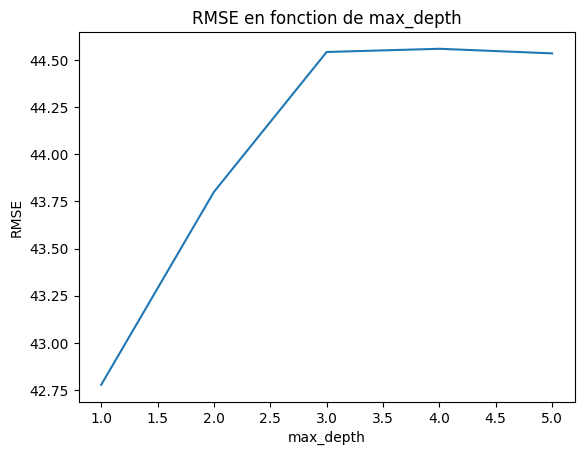

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee)

for i in range (len(features)):
    for j in range (len(features[i])):
        M=max(features[i])
        features[i][j]=features[i][j]/M
        
ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee) 

ensemble_donnees = [list(x[0]) + [int(x[1])] for x in ensemble_donnees]
ensemble_donnees = [x[:-1] for x in ensemble_donnees]


# Chargement et préparation des données
# Supposons que vous avez vos données dans les variables ensemble_donnees et decennies
# Convertir les données en tableau numpy
ensemble_donnees = np.array(ensemble_donnees)
decennies = np.array(decennies)

# Normalisation des données
scaler = StandardScaler()
ensemble_donnees = scaler.fit_transform(ensemble_donnees)

# Division des données en ensembles d'entraînement et de test
train_features, test_features, train_labels, test_labels = train_test_split(ensemble_donnees, decennies, test_size=0.2, random_state=42)


max_depth_values=[]
rmse_values=[]
a=[1,2,3,4,5]
for max_depth in a:
    # Entraînement de la Random Forest
    rf = RandomForestRegressor(n_estimators=100, max_depth=max_depth)
    rf.fit(train_features, train_labels)

    # Prédiction avec la Random Forest
    rf_predictions_train = rf.predict(train_features)
    rf_predictions_test = rf.predict(test_features)

    # Utilisation des prédictions de la Random Forest comme caractéristiques pour le réseau de neurones
    X_train_with_rf = np.concatenate((train_features, rf_predictions_train.reshape(-1, 1)), axis=1)
    X_test_with_rf = np.concatenate((test_features, rf_predictions_test.reshape(-1, 1)), axis=1)

    # Création et entraînement du réseau de neurones
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train_with_rf.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train_with_rf, train_labels, epochs=10, batch_size=32)

    # Prédiction avec le réseau de neurones
    nn_predictions = model.predict(X_test_with_rf)

    # Évaluation des performances
    mse = np.mean((nn_predictions - test_labels) ** 2)
    rmse = np.sqrt(mse)
    
    max_depth_values.append(max_depth)
    rmse_values.append(rmse)

plt.plot(max_depth_values, rmse_values)
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.title('RMSE en fonction de max_depth')
plt.show()


In [53]:
a=np.linspace(0.1,3,10)
a

array([0.1       , 0.42222222, 0.74444444, 1.06666667, 1.38888889,
       1.71111111, 2.03333333, 2.35555556, 2.67777778, 3.        ])

Epoch 1/10
302/302 [==============================] - 1s 1ms/step - loss: 101894.3828
Epoch 2/10
302/302 [==============================] - 0s 1ms/step - loss: 722.1899
Epoch 3/10
302/302 [==============================] - 0s 1ms/step - loss: 716.6764
Epoch 4/10
302/302 [==============================] - 0s 1ms/step - loss: 720.8369
Epoch 5/10
302/302 [==============================] - 0s 968us/step - loss: 701.7154
Epoch 6/10
302/302 [==============================] - 0s 1ms/step - loss: 696.5807
Epoch 7/10
302/302 [==============================] - 0s 1ms/step - loss: 700.5327
Epoch 8/10
302/302 [==============================] - 0s 1ms/step - loss: 693.9144
Epoch 9/10
302/302 [==============================] - 0s 1ms/step - loss: 718.4812
Epoch 10/10
48/48 [==============================] - 0s 706us/step
Epoch 1/10
151/151 [==============================] - 1s 943us/step - loss: 559468.9375
Epoch 2/10
151/151 [==============================] - 0s 907us/step - loss: 724.3042
Epoch 3/

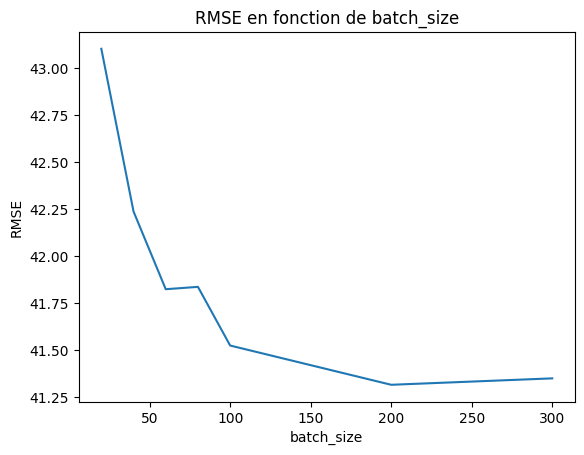

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee)

for i in range (len(features)):
    for j in range (len(features[i])):
        M=max(features[i])
        features[i][j]=features[i][j]/M
        
ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee) 

ensemble_donnees = [list(x[0]) + [int(x[1])] for x in ensemble_donnees]
ensemble_donnees = [x[:-1] for x in ensemble_donnees]


# Chargement et préparation des données
# Supposons que vous avez vos données dans les variables ensemble_donnees et decennies
# Convertir les données en tableau numpy
ensemble_donnees = np.array(ensemble_donnees)
decennies = np.array(decennies)

# Normalisation des données
scaler = StandardScaler()
ensemble_donnees = scaler.fit_transform(ensemble_donnees)

# Division des données en ensembles d'entraînement et de test
train_features, test_features, train_labels, test_labels = train_test_split(ensemble_donnees, decennies, test_size=0.2, random_state=42)


batch_size_values=[]
rmse_values=[]
a=[20,40,60,80,100,200,300]
for batch_size in a:
    # Entraînement de la Random Forest
    rf = RandomForestRegressor(n_estimators=100, max_depth=1)
    rf.fit(train_features, train_labels)

    # Prédiction avec la Random Forest
    rf_predictions_train = rf.predict(train_features)
    rf_predictions_test = rf.predict(test_features)

    # Utilisation des prédictions de la Random Forest comme caractéristiques pour le réseau de neurones
    X_train_with_rf = np.concatenate((train_features, rf_predictions_train.reshape(-1, 1)), axis=1)
    X_test_with_rf = np.concatenate((test_features, rf_predictions_test.reshape(-1, 1)), axis=1)

    # Création et entraînement du réseau de neurones
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train_with_rf.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train_with_rf, train_labels, epochs=10, batch_size=batch_size)

    # Prédiction avec le réseau de neurones
    nn_predictions = model.predict(X_test_with_rf)

    # Évaluation des performances
    mse = np.mean((nn_predictions - test_labels) ** 2)
    rmse = np.sqrt(mse)
    
    batch_size_values.append(batch_size)
    rmse_values.append(rmse)

plt.plot(batch_size_values, rmse_values)
plt.xlabel('batch_size')
plt.ylabel('RMSE')
plt.title('RMSE en fonction de batch_size')
plt.show()


=======================================================================================================================================================================================================================

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow import keras

ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee)

for i in range (len(features)):
    for j in range (len(features[i])):
        M=max(features[i])
        features[i][j]=features[i][j]/M
        
ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee) 

ensemble_donnees = [list(x[0]) + [int(x[1])] for x in ensemble_donnees]
ensemble_donnees = [x[:-1] for x in ensemble_donnees]


# Chargement et préparation des données
# Supposons que vous avez vos données dans les variables ensemble_donnees et decennies
# Convertir les données en tableau numpy
ensemble_donnees = np.array(ensemble_donnees)
decennies = np.array(decennies)

# Normalisation des données
scaler = StandardScaler()
ensemble_donnees = scaler.fit_transform(ensemble_donnees)

# Division des données en ensembles d'entraînement et de test
train_features, test_features, train_labels, test_labels = train_test_split(ensemble_donnees, decennies, test_size=0.2, random_state=42)

# Entraînement de la régression logistique
logreg = LogisticRegression()
logreg.fit(train_features, train_labels)

# Prédiction avec la régression logistique
logreg_predictions = logreg.predict(test_features)

# Utilisation des prédictions de la régression logistique comme caractéristiques pour le réseau de neurones
X_train_with_logreg = np.concatenate((train_features, logreg.predict(train_features).reshape(-1, 1)), axis=1)
X_test_with_logreg = np.concatenate((test_features, logreg_predictions.reshape(-1, 1)), axis=1)

# Création et entraînement du réseau de neurones
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_with_logreg.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train_with_logreg, train_labels, epochs=10, batch_size=200)

# Prédiction avec le réseau de neurones
nn_predictions = model.predict(X_test_with_logreg)

# Évaluation des performances
mse = np.mean((nn_predictions - test_labels) ** 2)
rmse = np.sqrt(mse)
print("RMSE du modèle combinant la régression logistique et le réseau de neurones : ", rmse)


Epoch 1/10
31/31 [==============================] - 1s 1ms/step - loss: 2227874.5000
Epoch 2/10
31/31 [==============================] - 0s 2ms/step - loss: 80911.7109
Epoch 3/10
31/31 [==============================] - 0s 2ms/step - loss: 3688.4846
Epoch 4/10
31/31 [==============================] - 0s 2ms/step - loss: 931.1091
Epoch 5/10
31/31 [==============================] - 0s 2ms/step - loss: 806.1793
Epoch 6/10
31/31 [==============================] - 0s 2ms/step - loss: 800.4897
Epoch 7/10
31/31 [==============================] - 0s 2ms/step - loss: 798.3414
Epoch 8/10
31/31 [==============================] - 0s 2ms/step - loss: 796.2643
Epoch 9/10
31/31 [==============================] - 0s 2ms/step - loss: 793.9534
Epoch 10/10
48/48 [==============================] - 0s 852us/step
RMSE du modèle combinant la régression logistique et le réseau de neurones :  51.12080607442085


=============================================================================================================================================================================================================================================

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow import keras

ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee)

for i in range (len(features)):
    for j in range (len(features[i])):
        M=max(features[i])
        features[i][j]=features[i][j]/M
        
ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee) 

ensemble_donnees = [list(x[0]) + [int(x[1])] for x in ensemble_donnees]
ensemble_donnees = [x[:-1] for x in ensemble_donnees]


# Chargement et préparation des données
# Supposons que vous avez vos données dans les variables ensemble_donnees et decennies
# Convertir les données en tableau numpy
ensemble_donnees = np.array(ensemble_donnees)
decennies = np.array(decennies)

# Normalisation des données
scaler = StandardScaler()
ensemble_donnees = scaler.fit_transform(ensemble_donnees)

# Division des données en ensembles d'entraînement et de test
train_features, test_features, train_labels, test_labels = train_test_split(ensemble_donnees, decennies, test_size=0.2, random_state=42)

# Entraînement de la régression linéaire
linreg = LinearRegression()
linreg.fit(train_features, train_labels)

# Prédiction avec la régression linéaire
linreg_predictions = linreg.predict(test_features)

# Utilisation des prédictions de la régression linéaire comme caractéristiques pour le réseau de neurones
X_train_with_linreg = np.concatenate((train_features, linreg.predict(train_features).reshape(-1, 1)), axis=1)
X_test_with_linreg = np.concatenate((test_features, linreg_predictions.reshape(-1, 1)), axis=1)

# Création et entraînement du réseau de neurones
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_with_linreg.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train_with_linreg, train_labels, epochs=10, batch_size=200)

# Prédiction avec le réseau de neurones
nn_predictions = model.predict(X_test_with_linreg)

# Évaluation des performances
mse = np.mean((nn_predictions - test_labels) ** 2)
rmse = np.sqrt(mse)
print("RMSE du modèle combinant la régression linéaire et le réseau de neurones : ", rmse)


Epoch 1/10
31/31 [==============================] - 1s 2ms/step - loss: 1794481.6250
Epoch 2/10
31/31 [==============================] - 0s 2ms/step - loss: 74209.5625
Epoch 3/10
31/31 [==============================] - 0s 2ms/step - loss: 4295.6992
Epoch 4/10
31/31 [==============================] - 0s 2ms/step - loss: 796.8865
Epoch 5/10
31/31 [==============================] - 0s 2ms/step - loss: 664.4525
Epoch 6/10
31/31 [==============================] - 0s 2ms/step - loss: 654.4435
Epoch 7/10
31/31 [==============================] - 0s 2ms/step - loss: 655.5550
Epoch 8/10
31/31 [==============================] - 0s 2ms/step - loss: 654.5294
Epoch 9/10
31/31 [==============================] - 0s 2ms/step - loss: 654.6041
Epoch 10/10
48/48 [==============================] - 0s 1ms/step
RMSE du modèle combinant la régression linéaire et le réseau de neurones :  42.41869638527721
